# Classification Using Multiple Models

In [1]:
import numpy as np
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(123)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12


Build a classification model for the default of credit card clients dataset. More info here:
https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

- Explore the data
- Make sure you build a full data pipeline
- Do you require any data pre-processing? Are all the features useful? (Use only raw features)
- set the random seed to 123 (For splitting or any other random algorithm)
- Split data into training (80%) and testing (20%)
- Follow similar procedure as the one for week 2 (End-to-end Machine Learning Project). Remember apendix B
- Study the ROC Curve, decide threshold
- Use 2 classifiers.
    - Random Forest
        - tune only: n_estimators: {4, 5, 10, 20, 50} 
    - KNN Classfier 
        - tune only: n_neighbors: {3, 5, 10, 20} 
    - Which one performs better in the cross validation?
    
http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

- Cross-validation with 5-folds

- Other paramenters -> Use default

# 1. Import data

In [1]:
import pandas as pd
df = pd.read_excel("data\default of credit card clients.xls", 
                   sheet = 0, skiprows= 1, header = 0)
print(df.shape)
df.head()

(30000, 25)


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


# 2. Explore data

Attribute Information:

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables: 
- X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. 
- X2: Gender (1 = male; 2 = female). 
- X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 
- X4: Marital status (1 = married; 2 = single; 3 = others). 
- X5: Age (year). 
- X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. 
    - X6 = the repayment status in September, 2005; 
    - X7 = the repayment status in August, 2005; . . .;
    - X11 = the repayment status in April, 2005. 
- X12-X17: Amount of bill statement (NT dollar). 
    - X12 = amount of bill statement in September, 2005; 
    - X13 = amount of bill statement in August, 2005; . . .; 
    - X17 = amount of bill statement in April, 2005. 
- X18-X23: Amount of previous payment (NT dollar). 
    - X18 = amount paid in September, 2005; 
    - X19 = amount paid in August, 2005; . . .;
    - X23 = amount paid in April, 2005. 

In [3]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

In [5]:
df["default payment next month"].value_counts()/len(df["default payment next month"])

0    0.7788
1    0.2212
Name: default payment next month, dtype: float64

In [6]:
cols = df.columns
cols_list = list(enumerate(cols))
cols_list

[(0, 'ID'),
 (1, 'LIMIT_BAL'),
 (2, 'SEX'),
 (3, 'EDUCATION'),
 (4, 'MARRIAGE'),
 (5, 'AGE'),
 (6, 'PAY_0'),
 (7, 'PAY_2'),
 (8, 'PAY_3'),
 (9, 'PAY_4'),
 (10, 'PAY_5'),
 (11, 'PAY_6'),
 (12, 'BILL_AMT1'),
 (13, 'BILL_AMT2'),
 (14, 'BILL_AMT3'),
 (15, 'BILL_AMT4'),
 (16, 'BILL_AMT5'),
 (17, 'BILL_AMT6'),
 (18, 'PAY_AMT1'),
 (19, 'PAY_AMT2'),
 (20, 'PAY_AMT3'),
 (21, 'PAY_AMT4'),
 (22, 'PAY_AMT5'),
 (23, 'PAY_AMT6'),
 (24, 'default payment next month')]

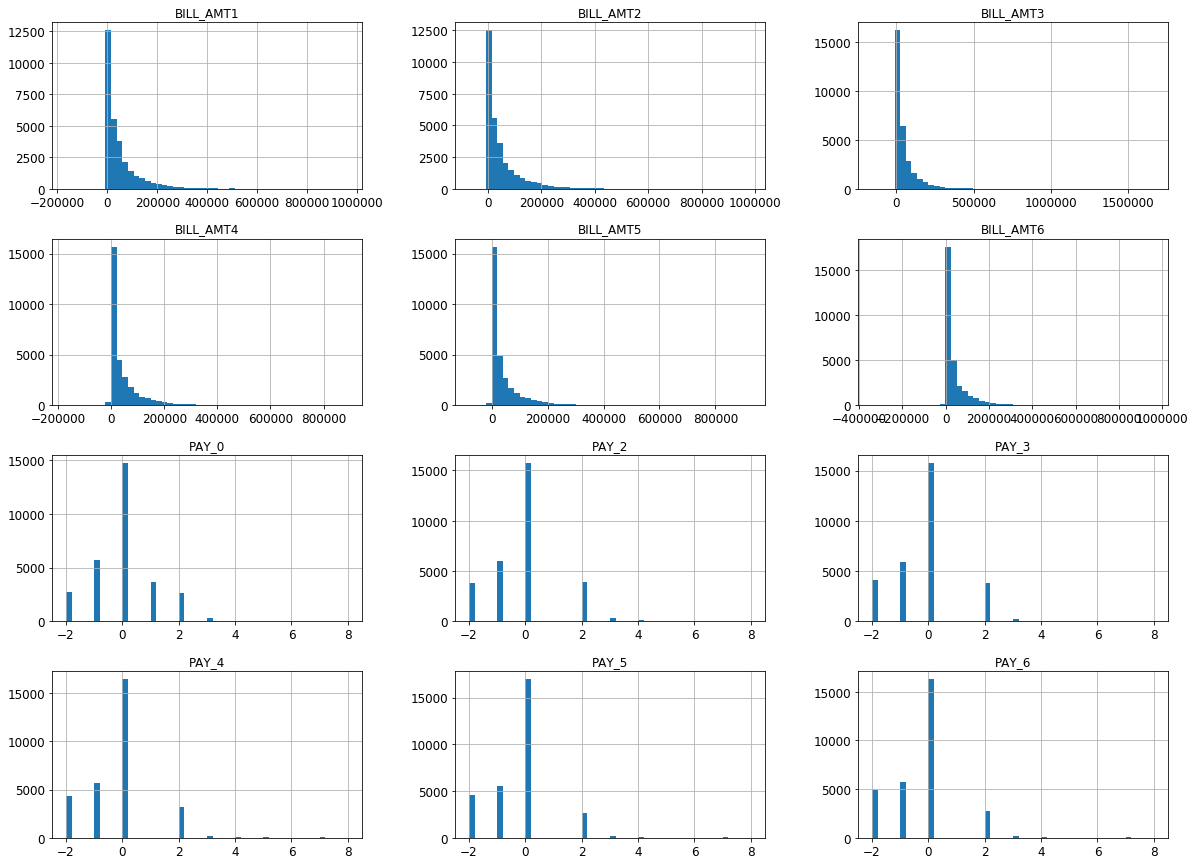

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
df[cols[6:18]].hist(bins=50, figsize=(20,15))
plt.show()

<font color = red> The data doesnt appear to need much cleaning, there are zero nulls.

It seems that X2, X3, X4 are categorical variables and will need to be converted to OneHotEncoding. Maybe X6-X11 as well (not sure how the -1=pay duly is going to work with the algo).  We will also need to scale the remaining continuous variable features (X12-X23) as the min/max values seem to be all over the place. 

# 3. Create a train/test splt

I'm not going to use a StratifiedSplit as I do not yet know which features are the most important. Perhaps I will retrain a model with a stratified training and test set once I understand the data a little better.

In [8]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.2, random_state=123)

df_train.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
19682,19683,200000,2,2,1,46,0,0,0,0,...,103422,95206,65108,3692,5000,3300,2500,2930,1500,0
11062,11063,120000,2,1,1,32,-1,-1,-1,-1,...,476,802,326,652,326,476,802,0,326,1
197,198,20000,2,1,2,22,0,0,0,0,...,8332,18868,19247,1500,1032,541,20000,693,1000,0
23620,23621,100000,2,5,2,34,0,0,0,0,...,23181,7721,3219,5004,3811,3002,4000,3219,1864,0
26031,26032,290000,2,2,2,29,0,0,0,0,...,8770,9145,10016,1130,1502,1300,500,1000,1001,0


# 4. Data Prep Pipeline

In [9]:
# Create column selector estimator
from sklearn.base import BaseEstimator, TransformerMixin
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [10]:
# Create OneHotEncoder estimator

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import check_array
from sklearn.preprocessing import LabelEncoder
from scipy import sparse

class CategoricalEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, encoding='onehot', categories='auto', dtype=np.float64,
                 handle_unknown='error'):
        self.encoding = encoding
        self.categories = categories
        self.dtype = dtype
        self.handle_unknown = handle_unknown

    def fit(self, X, y=None):
        """Fit the CategoricalEncoder to X.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_feature]
            The data to determine the categories of each feature.
        Returns
        -------
        self
        """

        if self.encoding not in ['onehot', 'onehot-dense', 'ordinal']:
            template = ("encoding should be either 'onehot', 'onehot-dense' "
                        "or 'ordinal', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.handle_unknown not in ['error', 'ignore']:
            template = ("handle_unknown should be either 'error' or "
                        "'ignore', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.encoding == 'ordinal' and self.handle_unknown == 'ignore':
            raise ValueError("handle_unknown='ignore' is not supported for"
                             " encoding='ordinal'")

        X = check_array(X, dtype=np.object, accept_sparse='csc', copy=True)
        n_samples, n_features = X.shape

        self._label_encoders_ = [LabelEncoder() for _ in range(n_features)]

        for i in range(n_features):
            le = self._label_encoders_[i]
            Xi = X[:, i]
            if self.categories == 'auto':
                le.fit(Xi)
            else:
                valid_mask = np.in1d(Xi, self.categories[i])
                if not np.all(valid_mask):
                    if self.handle_unknown == 'error':
                        diff = np.unique(Xi[~valid_mask])
                        msg = ("Found unknown categories {0} in column {1}"
                               " during fit".format(diff, i))
                        raise ValueError(msg)
                le.classes_ = np.array(np.sort(self.categories[i]))

        self.categories_ = [le.classes_ for le in self._label_encoders_]

        return self

    def transform(self, X):
        """Transform X using one-hot encoding.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_features]
            The data to encode.
        Returns
        -------
        X_out : sparse matrix or a 2-d array
            Transformed input.
        """
        X = check_array(X, accept_sparse='csc', dtype=np.object, copy=True)
        n_samples, n_features = X.shape
        X_int = np.zeros_like(X, dtype=np.int)
        X_mask = np.ones_like(X, dtype=np.bool)

        for i in range(n_features):
            valid_mask = np.in1d(X[:, i], self.categories_[i])

            if not np.all(valid_mask):
                if self.handle_unknown == 'error':
                    diff = np.unique(X[~valid_mask, i])
                    msg = ("Found unknown categories {0} in column {1}"
                           " during transform".format(diff, i))
                    raise ValueError(msg)
                else:
                    # Set the problematic rows to an acceptable value and
                    # continue `The rows are marked `X_mask` and will be
                    # removed later.
                    X_mask[:, i] = valid_mask
                    X[:, i][~valid_mask] = self.categories_[i][0]
            X_int[:, i] = self._label_encoders_[i].transform(X[:, i])

        if self.encoding == 'ordinal':
            return X_int.astype(self.dtype, copy=False)

        mask = X_mask.ravel()
        n_values = [cats.shape[0] for cats in self.categories_]
        n_values = np.array([0] + n_values)
        indices = np.cumsum(n_values)

        column_indices = (X_int + indices[:-1]).ravel()[mask]
        row_indices = np.repeat(np.arange(n_samples, dtype=np.int32),
                                n_features)[mask]
        data = np.ones(n_samples * n_features)[mask]

        out = sparse.csc_matrix((data, (row_indices, column_indices)),
                                shape=(n_samples, indices[-1]),
                                dtype=self.dtype).tocsr()
        if self.encoding == 'onehot-dense':
            return out.toarray()
        else:
            return out

In [11]:
cols

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [12]:
# Now let's build a pipeline for preprocessing the numerical attributes:

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion

# set variable lists
feats_num = ['LIMIT_BAL','PAY_0','PAY_2', 'PAY_3', 'PAY_4', 
            'PAY_5','PAY_6', 'BILL_AMT1', 'BILL_AMT2','BILL_AMT3',
            'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1','PAY_AMT2',
            'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
feats_cat = ['SEX', 'EDUCATION', 'MARRIAGE']

# continuous variables
num_pipeline = Pipeline([
        ('selector', DataFrameSelector(feats_num)),
        ('std_scaler', StandardScaler()),
    ])

# categorical variables
cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(feats_cat)),
        ('cat_encoder', CategoricalEncoder(encoding="onehot-dense")),
    ])

# join features
full_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline",num_pipeline),
    ("cat_pipeline", cat_pipeline),
])

df_train_preped = full_pipeline.fit_transform(df_train)
df_train_preped.shape

C:\Users\mciniello\AppData\Local\Continuum\Anaconda3\envs\py36\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


(24000, 32)

# 5. Select and train a model
First I will test out 3 different models to get some initial cross_val accuracy scores. I will then pick the best two and run a grid search on them.

I will run 3 different classifiers: 
1. SGDClassifier
2. Random Forest
    - tune only: n_estimators: {4, 5, 10, 20, 50} 
3. KNN Classfier 
    - tune only: n_neighbors: {3, 5, 10, 20} 

In [13]:
df_train.shape

(24000, 25)

In [20]:
# parse out labels
df_train_y = df_train['default payment next month'].copy()

In [21]:
# 1. SGD Classifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
sgd_clf = SGDClassifier(random_state=123)
mod1 = cross_val_score(sgd_clf, df_train_preped, df_train_y, scoring='accuracy',cv=5)

# 2. Random Forest
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=123)
mod2 = cross_val_score(forest_clf, df_train_preped, df_train_y, scoring='accuracy',cv=5)

# 3. KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
mod3 = cross_val_score(knn_clf, df_train_preped, df_train_y, scoring='accuracy',cv=5)

C:\Users\mciniello\AppData\Local\Continuum\Anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\mciniello\AppData\Local\Continuum\Anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol 

In [22]:
pd.DataFrame({"SGD":mod1,"RF":mod2,"KNN":mod3})

,KNN,RF,SGD
0,0.788586,0.796501,0.769215
1,0.792127,0.803999,0.776921
2,0.793750,0.801042,0.701042
3,0.799542,0.809960,0.812461
4,0.793707,0.808085,0.793499


<font color = red> It looks as the the Random Forest and KNN models scored the highest in terms of overall accuracy, so I will find tune these models and see what I get!

# 6. Model One: RandomForest

Fine tune the KNN and RF models using grid_search.

In [17]:
forest_clf.get_params().keys()

dict_keys(['bootstrap', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [18]:
# run GridSearchCV for RandomForest Model
from sklearn.model_selection import GridSearchCV
param_grid = [{'n_estimators': [4, 5, 10, 20, 50,75], 
               'max_features': [2, 4, 6, 8, 12]}]

forest_grid_search = GridSearchCV(forest_clf, param_grid, cv=5, 
                           scoring='accuracy',
                           return_train_score=True)

forest_grid_search.fit(df_train_preped, df_train_y)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=123,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [4, 5, 10, 20, 50, 75], 'max_features': [2, 4, 6, 8, 12]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [19]:
forest_results = pd.DataFrame(forest_grid_search.cv_results_)
forest_results.sort_values(by='rank_test_score')

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_max_features,param_n_estimators,params,rank_test_score,split0_test_score,split0_train_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
17,4.270683,0.087599,0.813958,0.995333,6,75,"{'max_features': 6, 'n_estimators': 75}",1,0.806499,0.994896,...,0.812500,0.995885,0.820588,0.995313,0.818087,0.995313,0.097062,1.753309e-02,0.004942,0.000317
11,3.356149,0.097839,0.813875,0.995365,4,75,"{'max_features': 4, 'n_estimators': 75}",2,0.807124,0.994843,...,0.810625,0.995885,0.818087,0.995417,0.819129,0.995313,0.657855,1.787414e-02,0.004512,0.000331
29,8.390493,0.082400,0.813792,0.995344,12,75,"{'max_features': 12, 'n_estimators': 75}",3,0.808790,0.994896,...,0.810208,0.995781,0.821421,0.995365,0.818087,0.995365,0.465693,8.800173e-03,0.005013,0.000281
23,5.677995,0.098359,0.813625,0.995323,8,75,"{'max_features': 8, 'n_estimators': 75}",4,0.810664,0.994948,...,0.811458,0.995729,0.820171,0.995261,0.815587,0.995313,0.270948,1.518762e-02,0.003783,0.000250
16,3.196954,0.067080,0.813458,0.994833,6,50,"{'max_features': 6, 'n_estimators': 50}",5,0.805874,0.994218,...,0.812292,0.995573,0.820588,0.994636,0.817879,0.995104,0.252047,1.482757e-02,0.005236,0.000464
22,3.675645,0.061760,0.813167,0.994740,8,50,"{'max_features': 8, 'n_estimators': 50}",6,0.810873,0.994323,...,0.809792,0.995313,0.820588,0.994688,0.815795,0.994792,0.038156,8.581361e-03,0.004422,0.000326
10,1.875776,0.059279,0.813000,0.994854,4,50,"{'max_features': 4, 'n_estimators': 50}",7,0.807957,0.994271,...,0.808750,0.995521,0.818712,0.994792,0.817045,0.995052,0.016573,6.239820e-03,0.004306,0.000419
28,5.690416,0.064440,0.811750,0.994781,12,50,"{'max_features': 12, 'n_estimators': 50}",8,0.807124,0.994010,...,0.808750,0.995365,0.817462,0.994740,0.816628,0.995157,0.202573,1.044250e-02,0.004372,0.000469
21,1.479467,0.026040,0.809792,0.989229,8,20,"{'max_features': 8, 'n_estimators': 20}",9,0.807332,0.988489,...,0.806458,0.989948,0.817670,0.989115,0.812669,0.989532,0.024162,1.686544e-02,0.004735,0.000489
27,2.329390,0.024160,0.809625,0.989427,12,20,"{'max_features': 12, 'n_estimators': 20}",10,0.806290,0.988385,...,0.805417,0.990000,0.815587,0.989792,0.813920,0.990209,0.170144,4.985283e-03,0.004246,0.000724


<font color = red> Hmm the best model of the grid search only returned an ~80% accuracy score, but the train scores are ~90%, which means the model is overfitting like cray. Thats not that good. Let's investigate the confusion matrix.

In [20]:
from sklearn.metrics import confusion_matrix

forest_grid_search_final = forest_grid_search.best_estimator_
forest_preds = forest_grid_search_final.predict(df_train_preped)

forest_cmat = confusion_matrix(df_train_y, forest_preds)
print(forest_cmat)

[[18634    34]
 [   88  5244]]


In [21]:
print("Accuracy: ",(forest_cmat[0,0]+forest_cmat[1,1])/forest_cmat.sum())

Accuracy:  0.994916666667


Weird, our model seems to be scoring much better with the entire training set than with the individual folds. The confusion matrix suggests that our model is over 99% accurate! Lets take a look at the ROC curve. 

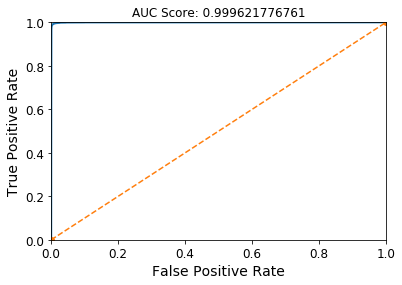

In [22]:
from sklearn.metrics import roc_curve, roc_auc_score

forest_probas = forest_grid_search_final.predict_proba(df_train_preped)
forest_fpr, forest_tpr, thresholds = roc_curve(df_train_y, forest_probas[:,1])
AUC=roc_auc_score(df_train_y, forest_probas[:,1])

def plot_roc_curve(fpr,tpr,lw,label=None, AUC=None):
    plt.plot(fpr,tpr,linewidth=lw,label=label)
    plt.plot([0,1],[0,1],'o--') #r-- creates an orange line. Neat!
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title("AUC Score: %s"%(AUC))
#roc_auc_score(df_train_y, forest_probas[:,1])
plot_roc_curve(forest_fpr, forest_tpr,lw=2,AUC=AUC)
plt.show()



# 7. Model two: KNearestNeighbors

In [23]:
knn_clf.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [24]:
# run GridSearchCV for KNN Model
param_grid = [{'n_neighbors':[3,5,10,20,30]}]

knn_grid_search = GridSearchCV(knn_clf, param_grid, cv=5, 
                           scoring='accuracy',
                           return_train_score=True)

knn_grid_search.fit(df_train_preped, df_train_y)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'n_neighbors': [3, 5, 10, 20, 30]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [25]:
knn_results = pd.DataFrame(knn_grid_search.cv_results_)
knn_results.sort_values(by='rank_test_score')

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_n_neighbors,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
4,0.089009,8.606661,0.812000,0.819417,30,{'n_neighbors': 30},1,0.807748,0.821397,0.812539,...,0.810625,0.820729,0.814753,0.817666,0.814336,0.817926,0.021654,0.431618,0.002581,0.001479
3,0.078487,7.909264,0.811458,0.820990,20,{'n_neighbors': 20},2,0.804416,0.823897,0.809415,...,0.810833,0.820729,0.818921,0.818707,0.813711,0.820530,0.010320,0.768664,0.004794,0.001670
2,0.065720,6.085600,0.806125,0.826625,10,{'n_neighbors': 10},3,0.800667,0.829314,0.803791,...,0.806667,0.825833,0.810377,0.824801,0.809127,0.826884,0.006152,0.105477,0.003539,0.001507
1,0.065520,5.568080,0.793542,0.842635,5,{'n_neighbors': 5},4,0.788586,0.844002,0.792127,...,0.793750,0.843385,0.799542,0.840737,0.793707,0.842456,0.006240,0.184277,0.003539,0.001102
0,0.077960,5.711600,0.775417,0.865521,3,{'n_neighbors': 3},5,0.772756,0.867441,0.771506,...,0.777083,0.866979,0.784330,0.862768,0.771411,0.865372,0.012793,0.624570,0.004912,0.001652


In [26]:
from sklearn.metrics import confusion_matrix

knn_grid_search_final = knn_grid_search.best_estimator_
knn_preds = knn_grid_search_final.predict(df_train_preped)

knn_cmat = confusion_matrix(df_train_y, knn_preds)
print(forest_cmat)

[[18634    34]
 [   88  5244]]


In [27]:
print("Accuracy: ",(knn_cmat[0,0]+knn_cmat[1,1])/knn_cmat.sum())

Accuracy:  0.819708333333


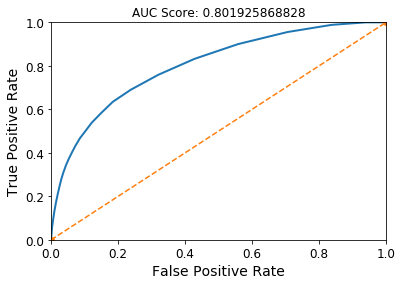

In [28]:
from sklearn.metrics import roc_curve, roc_auc_score

knn_probas = knn_grid_search_final.predict_proba(df_train_preped)
knn_fpr, knn_tpr, thresholds = roc_curve(df_train_y, knn_probas[:,1])
AUC=roc_auc_score(df_train_y, knn_probas[:,1])

plot_roc_curve(knn_fpr, knn_tpr,lw=2,AUC=AUC)
plt.show()



# 8. Run models on Test Data

The RandomForest is scoring much higher than the KNN model. However we will run the test on both and see what it looks like!

In [33]:
# parse out labels
df_test_y = df_test['default payment next month'].copy()

C:\Users\mciniello\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


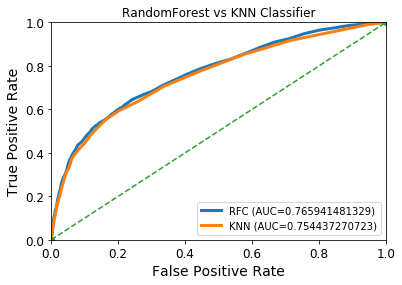

In [37]:
# prepare test data
df_test_preped = full_pipeline.fit_transform(df_test)

# predict labels using both models
forest_preds = forest_grid_search_final.predict(df_test_preped)
knn_preds = knn_grid_search_final.predict(df_test_preped)

# predict probas using both models
forest_probas = forest_grid_search_final.predict_proba(df_test_preped)
knn_probas = knn_grid_search_final.predict_proba(df_test_preped)

# compute ROC 
forest_fpr, forest_tpr, forest_thresholds = roc_curve(df_test_y, forest_probas[:,1])
knn_fpr, knn_tpr, knn_thresholds = roc_curve(df_test_y, knn_probas[:,1])

# compute AUC
forest_AUC=roc_auc_score(df_test_y, forest_probas[:,1])
knn_AUC=roc_auc_score(df_test_y, knn_probas[:,1])

# plot data
plt.plot(forest_fpr,forest_tpr,linewidth=3,label='RFC (AUC=%s)'%forest_AUC)
plt.plot(knn_fpr,knn_tpr,linewidth=3,label='KNN (AUC=%s)'%knn_AUC)
plt.plot([0,1],[0,1],'o--') #r-- creates an orange line. Neat!
plt.axis([0,1,0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("RandomForest vs KNN Classifier")
plt.legend(loc="lower right")
plt.figure(figsize=(16, 12))

plt.show()


<font color=red> Interesting. It seems that the RandomForest model barely performs better than the KNN model on the test data. This suggests that the model is hugely overfitting to the training data (which I beleive is common with RandomForest models).

# 9. Choose a threshold for the RandomForestClassifier

In [51]:
choose_threshold = pd.DataFrame({'tpr': forest_tpr,'fpr':forest_fpr,'threshold':forest_thresholds})
choose_threshold.iloc[25:60,:]

,fpr,threshold,tpr
25,0.037053,0.586667,0.287577
26,0.039821,0.573333,0.295245
27,0.043015,0.560000,0.306748
28,0.046848,0.546667,0.324387
29,0.049617,0.533333,0.341258
30,0.052172,0.520000,0.355828
31,0.055153,0.506667,0.368098
32,0.059199,0.493333,0.378834
33,0.063458,0.480000,0.393405
34,0.063458,0.477778,0.394172


<font color=red> The threshold you choose depends largely on the business case at hand. As this is a credit modeling exercise, we likely want to make sure that we do not give out risky loans (and thus we want to make sure we have a very low false negative rate... negative is 'NOT default'). If we were a more risk seeking investor however, we may want to maximize the amount of good loans we have on our books, so we would instead be looking to maximize the true negative rate (meaning that we are hitting as many zeros correctly as possible).  

At around a threshold of 50%, we have a FPR of 0.05 and a TPR of 0.35. This is not that great, as it implies that we can only identify ~35% of loans that are likely to default. This TPR rises as the threshold decreases, however the FPR rises as well, meaning that we will be classifing many potentially good investments as too risky. 

### Submit your notebook

Submit your solution here
https://goo.gl/forms/VKD7Zwu54oHjutDc2
Make sure you rename your notebook to    
W3_UTORid.ipynb    
Example W3_adfasd01.ipynb
